# Check and download the data
 In this part you will be checking whether if the data already exist or not. If neither the csv file or zip file of the data exist, then use request function to download from url, and read in dataframe with pandas read_csv function.

In [7]:
import os 
import pandas as pd
import zipfile

cwd = os.getcwd()
cwd
if cwd is not '/Users/sabiha/PhD/Courses/DS':
    os.chdir("/Users/sabiha/PhD/Courses/DS")
    os.listdir('.')
else:
    pass

csv_filename = 'HCEPDB_moldata.csv'
zip_filename = 'HCEPDB_moldata.zip'
if os.path.exists(csv_filename):
    print("You're unzipped and ready to roll!")
   
else:
    if os.path.exists(zip_filename):
        print("Yay! You got a zip file already!")
    else: 
        print ("Downloading")
        import requests
        url = 'http://faculty.washington.edu/dacb/HCEPDB_moldata.zip'
        req = requests.get(url)
        assert req.status_code == 200 # if the download failed, this line will generate an error
        with open(zipfilename, 'wb') as f:
          f.write(req.content)
    print ("unzipping the file")
    zf=zipfile.ZipFile(zip_filename)
    data = pd.read_csv(zf.open(csv_filename))
print ("Here are the first few rows of data:")
data.head(3)

You're unzipped and ready to roll!
Here are the first few rows of data:


,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
0,655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1
1,1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074,C1=CC=C(C1)c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH...
2,21847,C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1...,C24H17NOSi,363.4903,0.000000,0.000000,197.474780,-4.539526,1.462158,-3.077368,C1=CC=C(C1)C1=Cc2oc3c(c2[SiH2]1)c1c[nH]cc1c1cc...


# Exploring data
  **keys** : show you the name of each column<br>
  **shape** : gives you the dimention of your dataframe<br>
  **head** : prints out the first few lines of your data<br>
  **data['name of the column']** : shows you the selected column<br> 
  **dtypes** : shows you the data type of each column<br> 
  **memory_usage()** : shows you the how big each row is<br> 
  *you can also select certain columns or rows, select with prerequirement<br>*
  **data[data.mass > 600]** : will print the data that met the requirement of mass > 600.<br>
  **data[(data.mass >= 600) & (data.jsc < 100)]** : select the data that meet both conditions. You can use | for either. data[(data.mass >= 600) | (data.jsc < 100)]<br>
  **data.set_index('id')** : For convinience, set the index to the id of the molecules.<br>
  **data.groupby(data['stoich_str']).count()** : with this, user can count datas that has same stoich-str.<br>
  **data[data['stoich_str'].str.contains("Se","Si")]** : This allows you to choose molecules that contains element of interest.<br>
  **data[data['stoich_str'].str.contains("Se|Si")== False]** : with the value equal to false, this will allow you to not select data that contains certain elements. This can also be done using ~. <font color='red'>data[~data['stoich_str'].str.contains("Se","Si")]</font><br>


In [8]:
# This shows the keys in the CSV file
data.keys()

Index(['id', 'SMILES_str', 'stoich_str', 'mass', 'pce', 'voc', 'jsc',
       'e_homo_alpha', 'e_gap_alpha', 'e_lumo_alpha', 'tmp_smiles_str'],
      dtype='object')

In [9]:
# This gives you the dimention of your dataframe. here will give you the row and column size of the HCEPDB_moldata.csv
data.shape

(2322849, 11)

In [10]:
# This types out the head of the data. data.tail can also be used to print out the tail of the data
data.head ()

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
0,655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1
1,1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074,C1=CC=C(C1)c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH...
2,21847,C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1...,C24H17NOSi,363.4903,0.000000,0.000000,197.474780,-4.539526,1.462158,-3.077368,C1=CC=C(C1)C1=Cc2oc3c(c2[SiH2]1)c1c[nH]cc1c1cc...
3,65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025,C1=CC2=C([SiH2]1)C=C([SiH2]2)C1=Cc2[se]ccc2[Si...
4,720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680,C1=CC=C(C1)c1cc2[se]c3c4sccc4c4=CCC=c4c3c2o1


In [11]:
data['id']

0           655365
1          1245190
2            21847
3            65553
4           720918
5          1310744
6           196637
7           262174
8           393249
9               35
10         1048612
11          917542
12         1441831
13         1376296
14         1638442
15           98350
16         2162747
17          557119
18          753728
19          819265
20         1278019
21         2096063
22         2752585
23         1572945
24         2359381
25         1540183
26         1638500
27         2621542
28           98411
29          524398
            ...   
2322819    2705444
2322820    2925216
2322821    2742210
2322822    3092419
2322823    1253317
2322824    1841096
2322825    2770889
2322826    1816522
2322827    1810382
2322828    1648591
2322829    2705360
2322830    2349009
2322831    3091107
2322832       8152
2322833    1781722
2322834    2470223
2322835    2469856
2322836    1912803
2322837    1216485
2322838    2619366
2322839    1703911
2322840    1

In [12]:
data.dtypes

id                  int64
SMILES_str         object
stoich_str         object
mass              float64
pce               float64
voc               float64
jsc               float64
e_homo_alpha      float64
e_gap_alpha       float64
e_lumo_alpha      float64
tmp_smiles_str     object
dtype: object

In [13]:
data.memory_usage()

Index                   80
id                18582792
SMILES_str        18582792
stoich_str        18582792
mass              18582792
pce               18582792
voc               18582792
jsc               18582792
e_homo_alpha      18582792
e_gap_alpha       18582792
e_lumo_alpha      18582792
tmp_smiles_str    18582792
dtype: int64

In [14]:
# Print the data with mass > 600. 
data[data.mass > 600]

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
428813,2458985,c1cc2csc(-c3ccc([nH]3)-c3sc(-c4scc5[se]ccc45)c...,C22H11NS3Se3,622.4139,2.117061,0.301313,108.134318,-4.901313,1.913337,-2.987975,[nH]1c(ccc1-c1sc(-c2scc3[se]ccc23)c2cc[se]c12)...
429635,2167132,c1cc2csc(-c3sc(-c4ccc([nH]4)-c4scc5[se]ccc45)c...,C22H11NS3Se3,622.4139,1.969302,0.297605,101.840463,-4.897605,1.953046,-2.944559,[nH]1c(ccc1-c1sc(-c2scc3cc[se]c23)c2[se]ccc12)...
431101,3098271,c1cc2csc(-c3sc(-c4ccc([nH]4)-c4scc5[se]ccc45)c...,C22H11NS3Se3,622.4139,2.037827,0.287566,109.062905,-4.887566,1.909294,-2.978272,[nH]1c(ccc1-c1sc(-c2scc3cc[se]c23)c2cc[se]c12)...
432714,2736457,c1cc2csc(-c3ccc([nH]3)-c3sc(-c4scc5cc[se]c45)c...,C22H11NS3Se3,622.4139,1.828838,0.269955,104.263230,-4.869955,1.938612,-2.931343,[nH]1c(ccc1-c1sc(-c2scc3cc[se]c23)c2cc[se]c12)...
434604,2252246,c1cc2c(scc2[se]1)-c1ccc([nH]1)-c1sc(-c2scc3[se...,C22H11NS3Se3,622.4139,2.256848,0.301558,115.180406,-4.901558,1.872202,-3.029356,[nH]1c(ccc1-c1sc(-c2scc3[se]ccc23)c2[se]ccc12)...
436628,2063881,c1cc2c(scc2[se]1)-c1ccc([nH]1)-c1sc(-c2scc3[se...,C22H11NS3Se3,622.4139,2.351178,0.307595,117.639554,-4.907595,1.857923,-3.049672,[nH]1c(ccc1-c1sc(-c2scc3[se]ccc23)c2cc[se]c12)...
438753,2890499,c1cc2csc(-c3ccc([nH]3)-c3sc(-c4scc5cc[se]c45)c...,C22H11NS3Se3,622.4139,1.733965,0.270724,98.573546,-4.870724,1.974567,-2.896157,[nH]1c(ccc1-c1scc2cc[se]c12)-c1sc(-c2scc3cc[se...
441758,2638563,c1cc2csc(-c3ccc([nH]3)-c3sc(-c4scc5[se]ccc45)c...,C22H11NS3Se3,622.4139,2.013141,0.282843,109.541059,-4.882843,1.905019,-2.977824,[nH]1c(ccc1-c1scc2cc[se]c12)-c1sc(-c2scc3[se]c...
895083,1999704,c1c[nH]c(c1)-c1sc(-c2sc(-c3scc4[se]ccc34)c3[se...,C22H11NS3Se3,622.4139,2.671215,0.289282,142.113493,-4.889282,1.723239,-3.166043,[nH]1cccc1-c1sc(-c2sc(-c3scc4[se]ccc34)c3[se]c...
895112,2294711,c1c[nH]c(c1)-c1sc(-c2sc(-c3scc4cc[se]c34)c3cc[...,C22H11NS3Se3,622.4139,2.373130,0.293105,124.608163,-4.893105,1.819564,-3.073540,[nH]1cccc1-c1sc(-c2sc(-c3scc4cc[se]c34)c3cc[se...


In [15]:
# select the data that meet both conditions.
# you can use | for either. data[(data.mass >= 600) | (data.jsc < 100)]
data[(data.mass >= 600) & (data.jsc < 100)]


,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
438753,2890499,c1cc2csc(-c3ccc([nH]3)-c3sc(-c4scc5cc[se]c45)c...,C22H11NS3Se3,622.4139,1.733965,0.270724,98.573546,-4.870724,1.974567,-2.896157,[nH]1c(ccc1-c1scc2cc[se]c12)-c1sc(-c2scc3cc[se...
1010681,2687705,[SiH2]1C=c2c3c4[se]ccc4[se]c3c3c4nsnc4c(cc3c2=...,C22H10N2S2Se3Si,631.4330,0.000000,0.000000,0.000000,-5.233498,1.215021,-4.018476,c1cc2[se]c3c(c2[se]1)c1=C[SiH2]C=c1c1cc(-c2scc...
1010832,1971016,c1cc2csc(-c3cc4[se]c5c6[se]ccc6[se]c5c4c4ccccc...,C22H10SSe4,622.2270,2.670580,0.716953,57.327406,-5.316953,2.310532,-3.006421,c1cc2[se]c3c([se]c4cc(-c5scc6cc[se]c56)c5ccccc...
1011010,1840641,[SiH2]1C=c2c3c4[se]ccc4[se]c3c3c4nsnc4c(cc3c2=...,C22H10N2S2Se3Si,631.4330,0.000000,0.000000,0.000000,-5.186712,1.179741,-4.006972,c1cc2[se]c3c(c2[se]1)c1=C[SiH2]C=c1c1cc(-c2scc...
1011420,1219682,c1cc2c(scc2[se]1)-c1cc2[se]c3c4[se]ccc4[se]c3c...,C20H8S2Se4,628.2552,3.499543,0.576506,93.423325,-5.176506,2.011684,-3.164822,c1cc2[se]c3c([se]c4cc(-c5scc6[se]ccc56)c5cscc5...
1011783,598748,c1cc2c(scc2[se]1)-c1cc2[se]c3c4[se]ccc4[se]c3c...,C20H9NSSe4,611.2041,1.956295,0.356070,84.556320,-4.956070,2.076281,-2.879790,c1cc2[se]c3c([se]c4cc(-c5scc6[se]ccc56)c5c[nH]...
1013465,442177,c1cc2csc(-c3cc4[se]c5c6[se]ccc6[se]c5c4c4cscc3...,C20H8S2Se4,628.2552,3.358451,0.570360,90.622776,-5.170360,2.030048,-3.140312,c1cc2[se]c3c([se]c4cc(-c5scc6cc[se]c56)c5cscc5...
1013641,1393162,c1cc2csc(-c3cc4[se]c5c6[se]ccc6[se]c5c4c4c[nH]...,C20H9NSSe4,611.2041,1.817224,0.349153,80.101376,-4.949153,2.110768,-2.838385,c1cc2[se]c3c([se]c4cc(-c5scc6cc[se]c56)c5c[nH]...
1016584,1570235,c1cc2c(scc2[se]1)-c1cc2[se]c3c4[se]ccc4[se]c3c...,C20H8OSSe4,612.1882,3.455860,0.534577,99.493303,-5.134577,1.968367,-3.166209,c1cc2[se]c3c([se]c4cc(-c5scc6[se]ccc56)c5cocc5...
1016764,1079468,c1cc2csc(-c3cc4[se]c5c6[se]ccc6[se]c5c4c4cocc3...,C20H8OSSe4,612.1882,3.288604,0.530948,95.325067,-5.130948,1.998371,-3.132577,c1cc2[se]c3c([se]c4cc(-c5scc6cc[se]c56)c5cocc5...


In [16]:
# for convinience, set the index to id of the molecules.
data.set_index('id')

,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
id,,,,,,,,,,
655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1
1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074,C1=CC=C(C1)c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH...
21847,C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1...,C24H17NOSi,363.4903,0.000000,0.000000,197.474780,-4.539526,1.462158,-3.077368,C1=CC=C(C1)C1=Cc2oc3c(c2[SiH2]1)c1c[nH]cc1c1cc...
65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025,C1=CC2=C([SiH2]1)C=C([SiH2]2)C1=Cc2[se]ccc2[Si...
720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680,C1=CC=C(C1)c1cc2[se]c3c4sccc4c4=CCC=c4c3c2o1
1310744,C1C=CC=C1c1cc2[se]c3c(c4nsnc4c4ccncc34)c2c2ccc...,C24H13N3SSe,454.4137,5.605135,0.951911,90.622776,-5.551911,2.029717,-3.522194,C1=CC=C(C1)c1cc2[se]c3c(c4nsnc4c4ccncc34)c2c2c...
196637,C1C=CC=C1c1cc2[se]c3cc4ccsc4cc3c2[se]1,C17H10SSe2,404.2520,2.644436,0.587932,69.223461,-5.187932,2.201106,-2.986827,C1=CC=C(C1)c1cc2[se]c3cc4ccsc4cc3c2[se]1
262174,C1C=CC=C1c1cc2[se]c3c4occc4c4cscc4c3c2[se]1,C19H10OSSe2,444.2730,2.523057,0.397670,97.645325,-4.997670,1.982122,-3.015548,C1=CC=C(C1)c1cc2[se]c3c4occc4c4cscc4c3c2[se]1
393249,C1C=CC=C1c1cc2[se]c3cc4cccnc4cc3c2c2ccccc12,C24H15NSe,396.3495,3.115895,0.869140,55.174815,-5.469140,2.331815,-3.137325,C1=CC=C(C1)c1cc2[se]c3cc4cccnc4cc3c2c2ccccc12


In [17]:
pd.value_counts(data['mass'])

390.4646    4420
378.4536    4214
393.5405    3844
396.4928    3834
404.5674    3750
389.4805    3732
443.6003    3670
428.5134    3643
388.4924    3628
391.4527    3600
394.5286    3590
392.5564    3493
407.5197    3441
389.4765    3428
447.5407    3402
395.5047    3338
340.4048    3324
379.4417    3293
394.5206    3274
446.5526    3270
406.5316    3250
408.5078    3236
442.6162    3227
397.4809    3212
395.5087    3202
445.5685    3137
410.5956    3102
444.5884    3102
445.5645    3024
405.5555    2996
            ... 
468.1371       1
420.5824       1
291.3072       1
355.2182       1
519.0435       1
223.2737       1
406.4796       1
279.2541       1
401.4315       1
404.2939       1
322.6622       1
227.3297       1
320.4628       1
363.0374       1
300.5132       1
300.1743       1
263.2631       1
402.4156       1
302.2960       1
363.1353       1
419.3808       1
286.3984       1
390.4086       1
429.4335       1
291.2731       1
391.3927       1
421.3271       1
239.3407      

In [18]:
data.groupby(data['stoich_str']).count()

,id,SMILES_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
stoich_str,,,,,,,,,,
C10H10N2Si,5,5,5,5,5,5,5,5,5,5
C10H10OSi2,3,3,3,3,3,3,3,3,3,3
C10H10SSi2,3,3,3,3,3,3,3,3,3,3
C10H10SeSi2,3,3,3,3,3,3,3,3,3,3
C10H11NSi2,5,5,5,5,5,5,5,5,5,5
C10H12Si3,1,1,1,1,1,1,1,1,1,1
C10H6N2OS,8,8,8,8,8,8,8,8,8,4
C10H6N2S2,8,8,8,8,8,8,8,8,8,4
C10H6N2SSe,8,8,8,8,8,8,8,8,8,4


#### <font color='red'>As can seen from top, there are multiple configuration for the molecules with same stoich_str. strings cannot be plotted, so we can group by with same mass, assuming molecules with same stoich-str have same mass.</font> 

In [26]:
grouped = data.groupby(['mass']).mean()
df3 = pd.DataFrame(grouped).reset_index()
df3.columns = ['mass','id','pce','voc','jsc','e_homo_alpha','e_gap_alpha','e_lumo_alpha']
df3

,mass,id,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha
0,168.2378,4.827590e+05,0.799995,0.190067,64.777917,-4.790067,2.241447,-2.548621
1,169.2259,4.871338e+05,0.132965,0.045255,47.523738,-4.645255,2.421095,-2.224160
2,170.2100,1.191071e+06,0.869863,0.281719,47.184383,-4.881719,2.424693,-2.457026
3,170.2140,8.694866e+05,0.019104,0.035932,20.249330,-4.620687,2.852968,-1.767720
4,171.1981,5.332888e+05,0.328703,0.208172,24.189858,-4.808172,2.752186,-2.055986
5,171.2021,1.393113e+06,0.000000,0.000000,4.477932,-4.592363,3.361447,-1.230916
6,172.1822,2.957590e+05,0.784170,0.469000,25.496022,-5.069000,2.722330,-2.346670
7,172.1862,3.263923e+05,0.077394,0.186757,7.115059,-4.786757,3.204894,-1.581863
8,173.1703,7.690070e+05,0.236858,0.410971,8.946506,-5.010971,3.104210,-1.906761
9,174.1544,1.221741e+06,0.437508,0.671564,10.026431,-5.271564,3.062793,-2.208770


In [27]:
# This will allow you to choose molecules that contains certain elements.
data[data['stoich_str'].str.contains("Se")]

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
0,655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1
1,1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074,C1=CC=C(C1)c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH...
3,65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025,C1=CC2=C([SiH2]1)C=C([SiH2]2)C1=Cc2[se]ccc2[Si...
4,720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680,C1=CC=C(C1)c1cc2[se]c3c4sccc4c4=CCC=c4c3c2o1
5,1310744,C1C=CC=C1c1cc2[se]c3c(c4nsnc4c4ccncc34)c2c2ccc...,C24H13N3SSe,454.4137,5.605135,0.951911,90.622776,-5.551911,2.029717,-3.522194,C1=CC=C(C1)c1cc2[se]c3c(c4nsnc4c4ccncc34)c2c2c...
6,196637,C1C=CC=C1c1cc2[se]c3cc4ccsc4cc3c2[se]1,C17H10SSe2,404.2520,2.644436,0.587932,69.223461,-5.187932,2.201106,-2.986827,C1=CC=C(C1)c1cc2[se]c3cc4ccsc4cc3c2[se]1
7,262174,C1C=CC=C1c1cc2[se]c3c4occc4c4cscc4c3c2[se]1,C19H10OSSe2,444.2730,2.523057,0.397670,97.645325,-4.997670,1.982122,-3.015548,C1=CC=C(C1)c1cc2[se]c3c4occc4c4cscc4c3c2[se]1
8,393249,C1C=CC=C1c1cc2[se]c3cc4cccnc4cc3c2c2ccccc12,C24H15NSe,396.3495,3.115895,0.869140,55.174815,-5.469140,2.331815,-3.137325,C1=CC=C(C1)c1cc2[se]c3cc4cccnc4cc3c2c2ccccc12
11,917542,C1C=c2ccc3[se]c4c5[se]c(cc5[se]c4c3c2=C1)C1=CC...,C20H12Se3,489.1948,2.843278,0.302591,144.614366,-4.902591,1.708198,-3.194393,C1=CC=C(C1)c1cc2[se]c3c([se]c4ccc5=CCC=c5c34)c...
12,1441831,C1C=CC=C1C1=Cc2ncc3c4[se]ccc4cnc3c2C1,C18H12N2Se,335.2668,2.687240,0.675497,61.225278,-5.275497,2.270953,-3.004544,C1=CC=C(C1)C1=Cc2ncc3c4[se]ccc4cnc3c2C1


In [28]:
df2 = data[data['stoich_str'].str.contains("Se","Si")]
df2.shape

(721088, 11)

In [29]:
df3 = data[data['stoich_str'].str.contains("Si")]
df3.shape

(898943, 11)

In [30]:
data[data['stoich_str'].str.contains("Se|Si")== False]

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
17,557119,C1C=c2c3C=C(Cc3c3occc3c2=C1)C1=CC=CC1,C19H14O,258.3186,0.237205,0.024962,146.246545,-4.624962,1.700415,-2.924547,C1=CC=C(C1)C1=Cc2c(C1)c1occc1c1=CCC=c21
24,2359381,C1C=CC=C1C1=Cc2c(C1)c1c3cscc3c3ccc4nsnc4c3c1c1...,C26H14N2OS2,434.5416,4.112982,0.299549,211.318161,-4.899549,1.409229,-3.490319,C1=CC=C(C1)C1=Cc2c(C1)c1c3cscc3c3ccc4nsnc4c3c1...
27,2621542,C1C=c2c3ccccc3c3c4ccccc4c4C=C(Cc4c3c2=C1)C1=CC...,C29H20,368.4770,2.552886,0.341115,115.180406,-4.941115,1.872759,-3.068355,C1=CC=C(C1)C1=Cc2c(C1)c1c(c3ccccc23)c2ccccc2c2...
30,131187,C1C=c2c3ccc4nsnc4c3c3cnc4C=C(Cc4c3c2=C1)C1=CC=CC1,C24H15N3S,377.4695,6.517681,0.691659,145.026911,-5.291659,1.706854,-3.584805,C1=CC=C(C1)C1=Cc2ncc3c(c2C1)c1=CCC=c1c1ccc2nsn...
34,819324,C1C=CC=C1C1=Cc2cnc3c(c2C1)c1c[nH]cc1c1ccc2cccc...,C27H18N2,370.4532,2.165335,0.463532,71.894072,-5.063532,2.176278,-2.887254,C1=CC=C(C1)C1=Cc2cnc3c(c2C1)c1c[nH]cc1c1ccc2cc...
40,912065,C1C=CC=C1C1=Cc2c(C1)c1sc3ccsc3c1c1cocc21,C20H12OS2,332.4458,1.822889,0.219556,127.779598,-4.819556,1.799819,-3.019738,C1=CC=C(C1)C1=Cc2c(C1)c1sc3ccsc3c1c1cocc21
42,1294359,C1C=CC=C1C1=Cc2c(C1)c1c3ccccc3c3ccncc3c1c1c[nH...,C27H18N2,370.4532,1.659723,0.235206,108.601295,-4.835206,1.910553,-2.924652,C1=CC=C(C1)C1=Cc2c(C1)c1c3ccccc3c3ccncc3c1c1c[...
49,2228382,C1C=CC=C1C1=Cc2ccc3c(c2C1)c1ccccc1c1ccc2cscc2c31,C28H18S,386.5162,2.493540,0.439489,87.320404,-5.039489,2.055788,-2.983701,C1=CC=C(C1)C1=Cc2ccc3c(c2C1)c1ccccc1c1ccc2cscc...
51,360614,C1C=c2c3ccoc3c3cnc4C=C(Cc4c3c2=C1)C1=CC=CC1,C22H15NO,309.3665,2.876909,0.501635,88.264528,-5.101635,2.047963,-3.053671,C1=CC=C(C1)C1=Cc2ncc3c4occc4c4=CCC=c4c3c2C1
54,1010375,C1C=CC=C1C1=Cc2sc3c(cnc4cccnc34)c2C1,C18H12N2S,288.3728,2.987435,0.620208,74.132525,-5.220208,2.159418,-3.060790,C1=CC=C(C1)C1=Cc2sc3c(cnc4cccnc34)c2C1


# Simple Plots
### <font color=blue>Here are examples on 2D and 3D plots.</font>

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [ ]:
plot1 = plt.scatter(df2['mass'], df2['pce'], s = 20, alpha=0.1, c = 'purple')
plt.legend()
plt.ylabel('pce')
plt.xlabel('mass')
plt.title('Mass and pce plot')

Text(0.5,1,'Mass and pce plot')

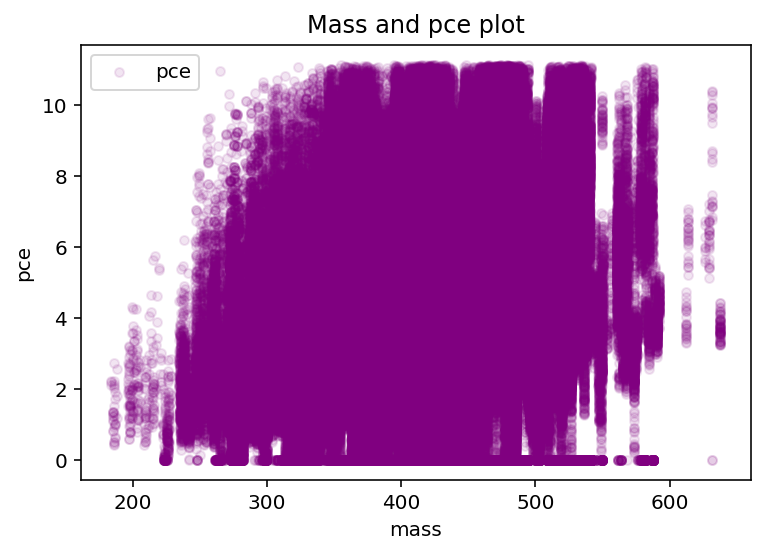

In [35]:
plot2 = plt.scatter(df3['mass'],df3['pce'], s = 20, alpha=0.1, c = 'purple')
plt.legend()
plt.ylabel('pce')
plt.xlabel('mass')
plt.title('Mass and pce plot')

Text(0.5,0,'jsc')

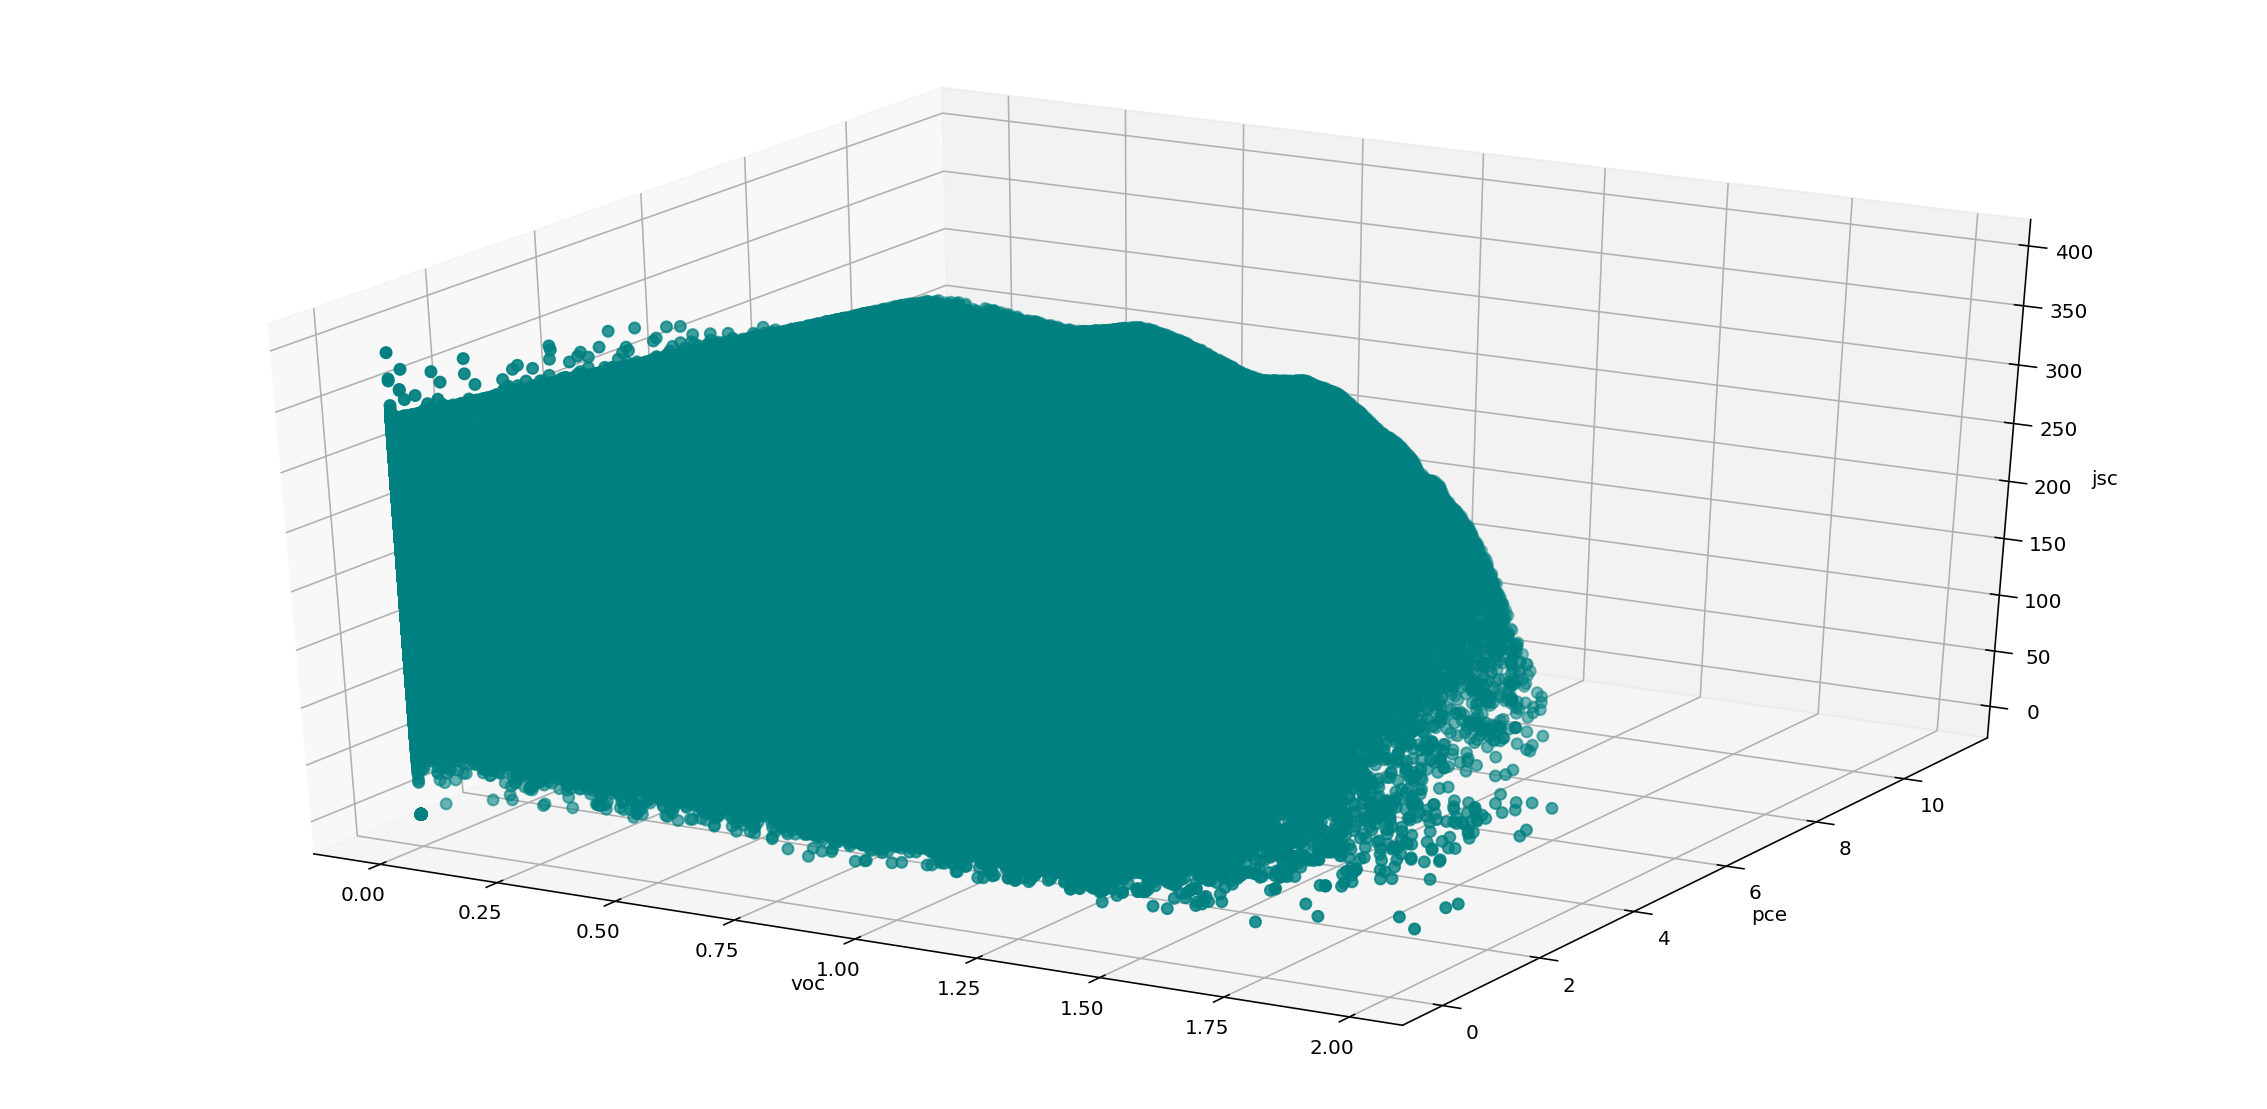

In [34]:
%matplotlib qt
fig = plt.figure(figsize = (20,20), facecolor = 'w', edgecolor = 'k')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df3['voc'], df3['pce'], df3['jsc'], color = 'teal', s = 30, label = 'stuff')
ax.set_xlabel('voc')
ax.set_ylabel('pce')
ax.set_zlabel('jsc')